# Image Filtering

Goal of the lecture:
1. Understand and apply basic image filtering operations
    - Average Filtering
    - Median Filtering
    - Sobel Filtering
1. Learn how to define custom filters
1. Utilize filter operations to denoise an image
1. Download and open a satellite image from [Copernicus Dataspace](https://dataspace.copernicus.eu/) and apply filters on the satellite image

In [1]:
# importing libraries and defining _smart_ imshow function
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt


def custom_imshow(*args, **kwargs):
    # force cmap to be gray
    kwargs["cmap"] = "gray"
    # Force range to be 8-bit range
    kwargs["vmin"] = 0
    kwargs["vmax"] = 255
    plt.figure(figsize = (2,2))
    plt.imshow(*args, **kwargs)
    plt.axis("off")

## Image Filtering

Useful links:
- Theoretical lecture
- Videos of [Computerphile](https://www.youtube.com/user/Computerphile) on the topic
    - [Mean Filtering](https://www.youtube.com/watch?v=C_zFhWdM4ic&ab_channel=Computerphile)
    - [Sobel](https://www.youtube.com/watch?v=uihBwtPIBxM&ab_channel=Computerphile)
    

To avoid unhelpful issues with integer operations, the following section will use floats in the range (0, 1).

In [2]:
def gray_imshow(*args, **kwargs):
    """Imshow wrapper which sets cmap="gray" and disables the axis"""
    kwargs["cmap"] = "gray"
    # no restrictions on vmin/vmax
    # kwargs["vmin"] = 0
    # kwargs["vmax"] = 255
    plt.figure(figsize = (2,2))
    plt.imshow(*args, **kwargs)
    plt.axis("off")


def get_float_arr():
    a = np.zeros((15, 15), dtype=np.float32)
    a[:, 3:6] = 0.5
    a[:, 6:9] = 1.0
    a[:, 9:12] = 0.5
    return a

### Average filtering

In [3]:
a = get_float_arr()
# now we need to manually set vmin/vmax [0, 1]
print(a)

[[0.  0.  0.  0.5 0.5 0.5 1.  1.  1.  0.5 0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.5 1.  1.  1.  0.5 0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.5 1.  1.  1.  0.5 0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.5 1.  1.  1.  0.5 0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.5 1.  1.  1.  0.5 0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.5 1.  1.  1.  0.5 0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.5 1.  1.  1.  0.5 0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.5 1.  1.  1.  0.5 0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.5 1.  1.  1.  0.5 0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.5 1.  1.  1.  0.5 0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.5 1.  1.  1.  0.5 0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.5 1.  1.  1.  0.5 0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.5 1.  1.  1.  0.5 0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.5 1.  1.  1.  0.5 0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.5 1.  1.  1.  0.5 0.5 0.5 0.  0.  0. ]]


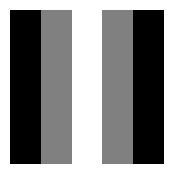

In [10]:
gray_imshow(a, vmin=0, vmax=1.0)

In [11]:
avg_kernel = np.ones((3, 3))
avg_out = ndimage.convolve(a, avg_kernel)
print(avg_out)

[[0.  0.  1.5 3.  4.5 6.  7.5 9.  7.5 6.  4.5 3.  1.5 0.  0. ]
 [0.  0.  1.5 3.  4.5 6.  7.5 9.  7.5 6.  4.5 3.  1.5 0.  0. ]
 [0.  0.  1.5 3.  4.5 6.  7.5 9.  7.5 6.  4.5 3.  1.5 0.  0. ]
 [0.  0.  1.5 3.  4.5 6.  7.5 9.  7.5 6.  4.5 3.  1.5 0.  0. ]
 [0.  0.  1.5 3.  4.5 6.  7.5 9.  7.5 6.  4.5 3.  1.5 0.  0. ]
 [0.  0.  1.5 3.  4.5 6.  7.5 9.  7.5 6.  4.5 3.  1.5 0.  0. ]
 [0.  0.  1.5 3.  4.5 6.  7.5 9.  7.5 6.  4.5 3.  1.5 0.  0. ]
 [0.  0.  1.5 3.  4.5 6.  7.5 9.  7.5 6.  4.5 3.  1.5 0.  0. ]
 [0.  0.  1.5 3.  4.5 6.  7.5 9.  7.5 6.  4.5 3.  1.5 0.  0. ]
 [0.  0.  1.5 3.  4.5 6.  7.5 9.  7.5 6.  4.5 3.  1.5 0.  0. ]
 [0.  0.  1.5 3.  4.5 6.  7.5 9.  7.5 6.  4.5 3.  1.5 0.  0. ]
 [0.  0.  1.5 3.  4.5 6.  7.5 9.  7.5 6.  4.5 3.  1.5 0.  0. ]
 [0.  0.  1.5 3.  4.5 6.  7.5 9.  7.5 6.  4.5 3.  1.5 0.  0. ]
 [0.  0.  1.5 3.  4.5 6.  7.5 9.  7.5 6.  4.5 3.  1.5 0.  0. ]
 [0.  0.  1.5 3.  4.5 6.  7.5 9.  7.5 6.  4.5 3.  1.5 0.  0. ]]


Why does the following code produce the _wrong_ output?

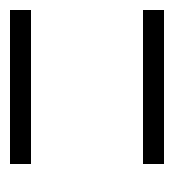

In [12]:
gray_imshow(avg_out, vmin=0, vmax=1)

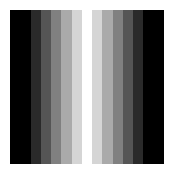

In [13]:
gray_imshow(avg_out, vmin=0, vmax=9)

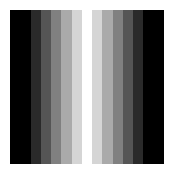

In [14]:
norm_avg_out = avg_out / avg_kernel.sum()
gray_imshow(norm_avg_out, vmin=0, vmax=1.0)

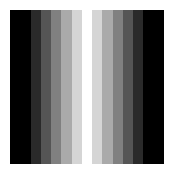

In [15]:
# watch out for implicit normalization of imshow for one channel inputs!
gray_imshow(avg_out)

The average filter:
- Blurs edges
    - Softer transitions (= smoothing effect)


#### In-course practice

- Try out different kernel sizes and note the effects

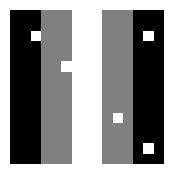

In [16]:
noisy_a = get_float_arr()

for n_x, n_y in [(5, 5), (-5, -5), (2, 2), (-2, -2), (2, -2)]:
    noisy_a[n_x, n_y] = 1.0
gray_imshow(noisy_a)

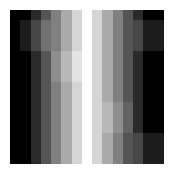

In [17]:
avg_kernel = np.ones((3, 3))
avg_out = ndimage.convolve(noisy_a, avg_kernel) / avg_kernel.sum()
gray_imshow(avg_out, vmin=0, vmax=1)

### Median Filtering

- Non-linear digital filtering technique
- Reduces noise while preserves edges
    - What other technique could be used to filter out noise without blurring the edges?
- Effective for "salt-and-pepper noise"
    - Sparsely occuring white and black pixels (defective pixels)

In [18]:
inp = np.zeros((3, 3))
inp[-1, -1] = inp[0, 0] = 1
inp

array([[1., 0., 0.],
       [0., 0., 0.],
       [0., 0., 1.]])

In [19]:
inp_flatten = inp.flatten()
inp_flatten

array([1., 0., 0., 0., 0., 0., 0., 0., 1.])

In [20]:
inp_sorted = np.sort(inp_flatten)
inp_sorted

array([0., 0., 0., 0., 0., 0., 0., 1., 1.])

In [21]:
idx = (inp_sorted.size - 1) // 2
idx

4

In [22]:
inp_sorted[idx]

0.0

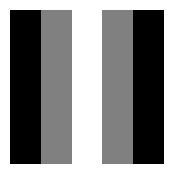

In [23]:
gray_imshow(
    ndimage.median_filter(noisy_a, size=(3, 3)),
    vmin=0,
    vmax=1,
)

#### In-course practice

Manually add noise with the maximum value to the input image that cannot be _filtered_ by the `3 x 3` median filter

In [27]:
# How can one achieve that?
noisy_a = get_float_arr()
for n_x, n_y in [(5, 5), (-5, -5), (2, 2), (-2, -2), (2, -2)]:
    noisy_a[n_x, n_y] = 1.0

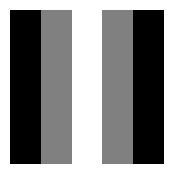

In [28]:
gray_imshow(
    ndimage.median_filter(noisy_a, size=(3, 3)),
    vmin=0,
    vmax=1,
)
# Discuss features vs noise issue!

### Sobel

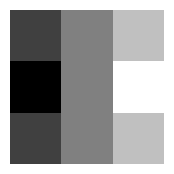

In [29]:
# note that the contents sum to 0
# Preserving center pixels with 2
# Prewitt would only have ones
sobel_x = np.array(
    [
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1],
    ]
)

gray_imshow(sobel_x)

In [30]:
a = get_float_arr()
sobel_x_a = ndimage.convolve(a, weights=sobel_x)
print(sobel_x_a)

[[ 0.  0. -2. -2.  0. -2. -2.  0.  2.  2.  0.  2.  2.  0.  0.]
 [ 0.  0. -2. -2.  0. -2. -2.  0.  2.  2.  0.  2.  2.  0.  0.]
 [ 0.  0. -2. -2.  0. -2. -2.  0.  2.  2.  0.  2.  2.  0.  0.]
 [ 0.  0. -2. -2.  0. -2. -2.  0.  2.  2.  0.  2.  2.  0.  0.]
 [ 0.  0. -2. -2.  0. -2. -2.  0.  2.  2.  0.  2.  2.  0.  0.]
 [ 0.  0. -2. -2.  0. -2. -2.  0.  2.  2.  0.  2.  2.  0.  0.]
 [ 0.  0. -2. -2.  0. -2. -2.  0.  2.  2.  0.  2.  2.  0.  0.]
 [ 0.  0. -2. -2.  0. -2. -2.  0.  2.  2.  0.  2.  2.  0.  0.]
 [ 0.  0. -2. -2.  0. -2. -2.  0.  2.  2.  0.  2.  2.  0.  0.]
 [ 0.  0. -2. -2.  0. -2. -2.  0.  2.  2.  0.  2.  2.  0.  0.]
 [ 0.  0. -2. -2.  0. -2. -2.  0.  2.  2.  0.  2.  2.  0.  0.]
 [ 0.  0. -2. -2.  0. -2. -2.  0.  2.  2.  0.  2.  2.  0.  0.]
 [ 0.  0. -2. -2.  0. -2. -2.  0.  2.  2.  0.  2.  2.  0.  0.]
 [ 0.  0. -2. -2.  0. -2. -2.  0.  2.  2.  0.  2.  2.  0.  0.]
 [ 0.  0. -2. -2.  0. -2. -2.  0.  2.  2.  0.  2.  2.  0.  0.]]


- Why are some values negative?
    - What does that mean?

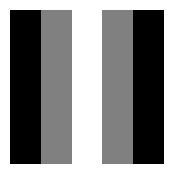

In [31]:
gray_imshow(a, vmin=0, vmax=1)

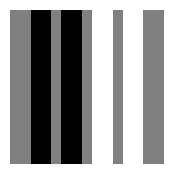

In [32]:
# utilize implicit normalization
# gray_imshow(np.absolute(sobel_x_a))
gray_imshow(sobel_x_a)

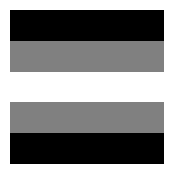

In [33]:
horz_a = get_float_arr().T
gray_imshow(horz_a)

What would the output of the sobel-x operation look like?

#### In-course practice

Define a Sobel-Y filter and apply it to `horz_a`.

In [ ]:
sobel_y = ...

Afterwards, try to construct a "diagonal" edge-detection filter.

### Applying on satellite images

#### Recap: Searching for and downloading a satellite image

These are codes you already know

In [34]:
import requests
from pathlib import Path

def get_access_token(username: str, password: str) -> str:
    """
    Get the access token for the Copernicus Data Store. This token is required to access the data for download.
    The token is not required for querying the data. It is valid for 3600 seconds (1 hour).

    ----------
    username : str
        The username for the Copernicus Data Store.
    password : str
        The password for the Copernicus Data Store.
    """
    data = {
        "client_id": "cdse-public",
        "username": username,
        "password": password,
        "grant_type": "password",
    }
    try:
        r = requests.post(
            "https://identity.dataspace.copernicus.eu/auth/realms/CDSE/protocol/openid-connect/token",
            data=data,
        )
        r.raise_for_status()
    except Exception as e:
        raise Exception(
            f"Access token creation failed. Response from the server was: {r.json()}"
        )
    return r.json()["access_token"]
    
# you may enter the credentials directly in your notebook
user_name = ""
password = ""

# the following code is for us to not have to share our secrets ;)
user_p = Path("user.txt")
pwd_p = Path("secret.txt")
if user_p.exists():
    user_name = user_p.read_text().strip()
if pwd_p.exists():
    password = pwd_p.read_text().strip()

assert user_name != "", "Please provide your user-name!"
assert password != "", "Please provide your password!"

# return the access token
access_token = get_access_token(user_name, password)

In [35]:
import geopandas
import pandas as pd

from typing import Optional, Iterable, Tuple
from datetime import date
from shapely.geometry import Point

def dataspace_dataframe_from_attributes(
    collection: str = "SENTINEL-2",
    aoi: Optional[str] = None,
    start_date: Optional[str] = None,
    end_date: Optional[str] = None,
    attributes: Optional[Iterable[Tuple[str, str, float]]] = None,
    max_returned_items: int = 20
):
    """
    Get a dataframe of items from the Copernicus DataSpace API based on the given attributes.
    The request is build based on the OData standard as documented at
    https://documentation.dataspace.copernicus.eu/APIs/OData.html

    Parameters
    ----------
    collection : str
        The collection to search for. Default is "SENTINEL-2".
    aoi : str, optional
        The area of interest in WKT format. Default is None.
    start_date : str, optional
        The start date in the format "YYYY-MM-DD". Default is None.
    end_date : str, optional
        The end date in the format "YYYY-MM-DD". Default is None.
    attributes : Iterable[Tuple[str, str, float]], optional
        The attributes to filter by. Default is None which means no filtering and is equivalent to an empty list.
        Each tuple should be in the format (key, comparison, value).
        The comparison should be one of "lt", "le", "eq", "ge", "gt".
        Currently only attributes of type double and that are comparable are supported.
    max_returned_items : int, optional
        The maximum number of items to return. Default is 20. Must be in [0, 1000].
    """
    if attributes is None:
        attributes = []
    request_str = "https://catalogue.dataspace.copernicus.eu/odata/v1/Products?$filter="
    request_str += f"Collection/Name eq '{collection}'"
    if aoi is not None:
        request_str += f" and OData.CSC.Intersects(area=geography'SRID=4326;{aoi}')"
    if start_date is not None:
        request_str += f" and ContentDate/Start gt {start_date}T00:00:00.000Z"
    if end_date is not None:
        request_str += f" and ContentDate/Start lt {end_date}T00:00:00.000Z"
    for k, comp, v in attributes:
        assert comp in ["lt", "le", "eq", "ge", "gt"]
        request_str += f" and Attributes/OData.CSC.DoubleAttribute/any(att:att/Name eq '{k}' and att/OData.CSC.DoubleAttribute/Value {comp} {v:.2f})"
    # get all attributes
    request_str += "&$expand=Attributes"
    # get top n items
    assert 0 <= max_returned_items <= 1000, f"Copernicus API only allows returned items in [0, 1000], but {max_returned_items} is outside this range."
    request_str += f"&$top={max_returned_items}"
    json_result = requests.get(request_str).json()
    json_vals = json_result['value']
    return pd.DataFrame.from_dict(json_result['value'])

start_date = date(year=2024, month=4, day=1)
end_date = date(year=2024, month=4, day=30)
satellite = "SENTINEL-2"
latitude = 41.01963
longitude = 28.99817

poi = geopandas.GeoSeries([Point(longitude, latitude)], crs="EPSG:4326").to_wkt()[0]

products = dataspace_dataframe_from_attributes(
    collection=satellite,
    start_date=start_date.strftime("%Y-%m-%d"),
    end_date=end_date.strftime("%Y-%m-%d"),
    aoi=poi,
    attributes=[('cloudCover', 'le', 1)]
)
products = products[products['Name'].str.contains("L2A")]
assert len(products) == 1, "Expected only a single result"
assert products.iloc[0].Name == 'S2A_MSIL2A_20240413T084601_N0510_R107_T35TPF_20240413T145352.SAFE', "Unexpected Name"
product_id = products.iloc[0].Id
product_id

'ca66740a-8cef-4c00-8173-8fff0fa32fab'

In [36]:
from tqdm.rich import tqdm

def download_file_with_progress(url: str, output_file: Path, update_session_headers: dict = None):
    """
    Given a `url` as a String and an `output_file` as a file-path the item will
    be downloaded and written to the `output_file`. If the `output_file` already
    exists, it will be overwritten.
    """
    s = requests.Session()
    if update_session_headers is not None:
        s.headers.update(update_session_headers)

    # unfortunately, redirects don't follow the standard - we implement our own
    response = s.head(url, allow_redirects=False)
    while response.status_code in (301, 302, 303, 307):
        url = response.headers['Location']
        response = s.head(url, allow_redirects=False)
        
    chunk_size = 2**20  # MB
    with s.get(url, stream=True) as resp:
        with open(output_file, "wb") as f:
            print(f"Saving to {output_file}")
            for data in tqdm(
                resp.iter_content(chunk_size=chunk_size), 
                total=int(resp.headers.get("content-length", 0)) // chunk_size, 
                unit="MB",
                unit_scale=True,
                desc="Downloading...",
            ):
                f.write(data)
                
data_path = Path("./data")
data_path.mkdir(exist_ok=True)
assert data_path.exists, "Should exist after calling mkdir!"

tile_name = Path(products.iloc[0].Name)
output_filepath = data_path / tile_name.with_suffix(".SAFE.zip")

url = f"https://catalogue.dataspace.copernicus.eu/odata/v1/Products({product_id})/$value"
download_file_with_progress(
    url=url, 
    output_file=output_filepath, 
    update_session_headers={'Authorization': f'Bearer {access_token}'}
)

Output()

Saving to data/S2A_MSIL2A_20240413T084601_N0510_R107_T35TPF_20240413T145352.SAFE.zip


/var/folders/3d/xpgdbrds7vj7yrmsdd8vdjlw0000gn/T/ipykernel_55949/2645290336.py:23: TqdmExperimentalWarning: rich is experimental/alpha
  for data in tqdm(


In [37]:
import zipfile

zipf = zipfile.ZipFile(output_filepath)
zipf.extractall(path="data")
unzipped_dir = Path(data_path / tile_name.with_suffix(".SAFE"))
assert unzipped_dir.exists(), f"{unzipped_dir} does not exist!"

#### Filtering on satellite images

36 images found in data/S2A_MSIL2A_20240413T084601_N0510_R107_T35TPF_20240413T145352.SAFE


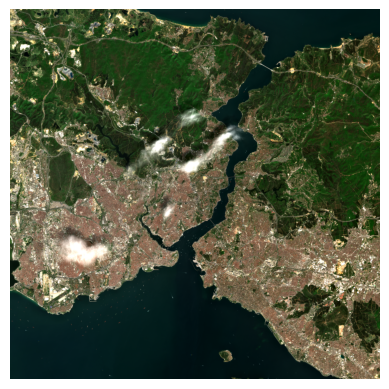

In [38]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np

# discussion from last time
def quant_norm_data(
        data: np.ndarray, lower_quant: float = 0.01, upper_quant: float = 0.99
) -> np.ndarray:
    """
    Normalize the data by quantiles `lower_quant/upper_quant`.
    The quantiles are calculated globally/*across all channels*.

    Parameters
    ----------
    data : np.ndarray
        The data to normalize.
    lower_quant : float
        The lower quantile. Default is 0.01.
    upper_quant : float
        The upper quantile. Default is 0.99.
    """
    masked_data = np.ma.masked_equal(data, 0)
    lq, uq = np.quantile(masked_data.compressed(), (lower_quant, upper_quant))
    data = np.clip(data, a_min=lq, a_max=uq)
    data = (data - lq) / (uq - lq)
    return data


def vis(data: np.ndarray, quant_norm: bool = False):
    """
    Visualize an array by calling `imshow` with `cmap="gray"` for 1 channel inputs and no cmap for 3 channel inputs.
    Expected shape is either (H, W) or (H, W, 3) for 1 and 3 channel inputs respectively. Assumes RGB order for 3
    channel inputs.

    Parameters
    ----------
    data : np.ndarray
        The data to visualize. Expected shape is either (H, W) or (H, W, 3) for 1 and 3 channel inputs respectively.
        Assumes RGB order for 3 channel inputs.
    quant_norm : bool
        Whether to quantile normalize the data. Default is False.
    """
    if quant_norm:
        data = quant_norm_data(data)
    if data.ndim == 2:
        plt.imshow(data, cmap="gray")
    elif data.ndim == 3:
        plt.imshow(data)
    else:
        raise ValueError(f"Expected data to have 2 or 3 dimensions, but got {data.ndim} dimensions.")
    plt.axis("off")
    plt.show()

class S2TileReader:
    def __init__(self, directory: Path):
        """
        Initialize the reader with a directory containing the SAFE file of a Sentinel-2 product.

        Parameters
        ----------
        directory : Path
            The directory containing the SAFE file of a Sentinel-2 product.
        """
        assert directory.is_dir(), f"{directory} is not a directory"
        self.image_files = list(directory.glob(f"**/IMG_DATA/*.jp2"))
        if len(self.image_files) == 0:
            self.image_files = list(directory.glob(f"**/IMG_DATA/R60m/*.jp2"))
            self.image_files.extend(list(directory.glob(f"**/IMG_DATA/R20m/*.jp2")))
            self.image_files.extend(list(directory.glob(f"**/IMG_DATA/R10m/*.jp2")))
        self.band2file_mapping = self._bands()
        self.bands = sorted(self.band2file_mapping.keys())
        print(f"{len(self.band2file_mapping)} images found in {directory}")

    def _bands(self):
        """
        Extract the band names from the image files and create a mapping from band name to file path.

        Example:
        {
            "B01": Path("path/to/B01.jp2"),
            "B02": Path("path/to/B02.jp2"),
            ...
        }
        or if the product has multiple resolutions:
        {
            "B01_60m": Path("path/to/R60m/B01.jp2"),
            "B02_10m": Path("path/to/R10m/B02.jp2"),
            ...
        }
        """
        return {"_".join(x.stem.split("_")[2:]):x for x in self.image_files}

    def read_band(self, band: str):
        """
        Read the data of a specific band. The data is returned as a numpy array. If the band is a single channel,
        the array will have shape (height, width). If the band is a multi-channel band, the array will have shape
        (height, width, channels).

        Parameters
        ----------
        band : str
            The name of the band to read. Must be one of the bands in the product.
            Use the `bands` attribute to see the available bands.
        """
        assert band in self.bands, f"Band {band} invalid. Please select one of {self.bands}"
        img_path = self.band2file_mapping[band]
        with rasterio.open(self.band2file_mapping[band]) as f:
            data = f.read()
        if data.shape[0] == 1:
            return data.squeeze(0)
        elif data.shape[0] == 3:
            return np.transpose(data, (1, 2, 0))


s2_reader = S2TileReader(unzipped_dir)
x = 500
y = 800
rgb_arr = np.stack(
    [s2_reader.read_band(b) for b in ("B04_60m", "B03_60m", "B02_60m")],
    axis=-1,
)[x:x+700, y:y+700]
vis(rgb_arr, quant_norm=True)

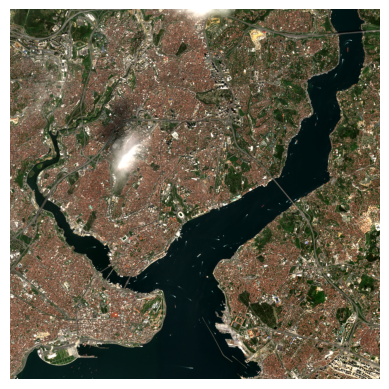

In [39]:
x = 805   # for 60m bands
y = 1035  # for 60m bands
size = 200  # for 60m bands

x, y, size = x*6, y*6, size*6
rgb_arr = np.stack(
    [s2_reader.read_band(b) for b in ("B04_10m", "B03_10m", "B02_10m")],
    axis=-1,
)[x:x+size, y:y+size]
vis(rgb_arr, quant_norm=True)

In [40]:
kernel_avg = ...
kernel_sobel_x = ...
kernel_sobel_y = ...
kernel_sobel_xy = ...
kernel_sobel_yx = ...
kernel_laplace = ...

kernels = {
    "Sobel X": kernel_sobel_x,
    "Sobel Y": kernel_sobel_y,
    "Sobel XY": kernel_sobel_xy,
    "Sobel YX": kernel_sobel_yx,
    "Median Blur": kernel_avg,
    "Laplacian": kernel_laplace,
}

TypeError: float() argument must be a string or a number, not 'ellipsis'

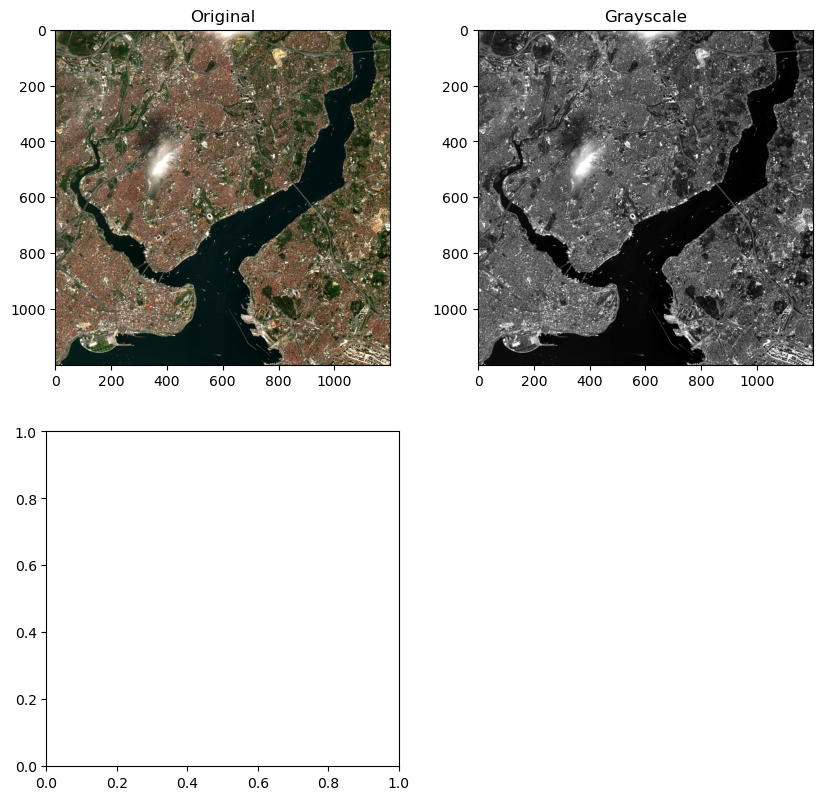

In [41]:
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

# display the binary classification and the edge detection
plt.figure(figsize=(10, 20))
plt.subplot(4, 2, 1)
plt.imshow(quant_norm_data(rgb_arr))
plt.title("Original")

plt.subplot(4, 2, 2)
plt.imshow(quant_norm_data(rgb2gray(rgb_arr)), cmap="gray")
plt.title("Grayscale")

for i, name in enumerate(kernels):
    kernel = kernels[name]
    plt.subplot(4, 2, i+3)
    if name == "Laplacian":
        gauss_kernel = np.array([
            [1,  2, 1], 
            [2, 4, 2], 
            [1,  2, 1]
        ]) / 16
        res = convolve(rgb2gray(rgb_arr), gauss_kernel, mode="constant", cval=0.0)
        name += " of Gaussian"
    res = convolve(rgb2gray(rgb_arr), kernel, mode="constant", cval=0.0)
    res = quant_norm_data(data=res, lower_quant=0.05, upper_quant=0.95)
    plt.imshow(res, cmap='gray')
    plt.title(f"Convolution with {name}")
plt.show()